In [1]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import joblib


In [2]:
#Load Dataset
df = pd.read_excel("D:\DigiHash\Redwine Quality Project\Copy of winequality-red.xlsx")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Dataset information
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#Create Target Variable(Binary)
df["good_wine"] = (df["quality"] >= 7).astype(int)

df["good_wine"].value_counts()


good_wine
0    1382
1     217
Name: count, dtype: int64

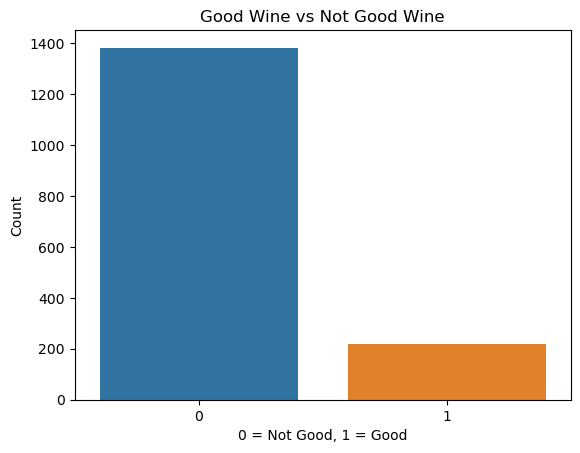

In [5]:
#Distribution Plot
sns.countplot(x="good_wine", data=df)
plt.title("Good Wine vs Not Good Wine")
plt.xlabel("0 = Not Good, 1 = Good")
plt.ylabel("Count")
plt.show()


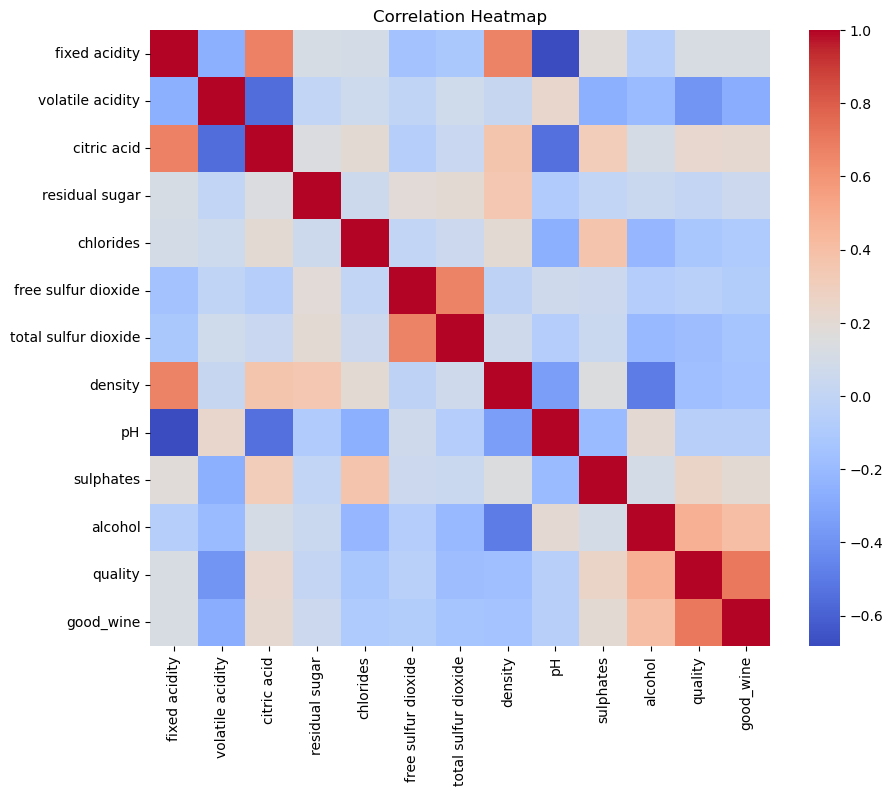

In [6]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


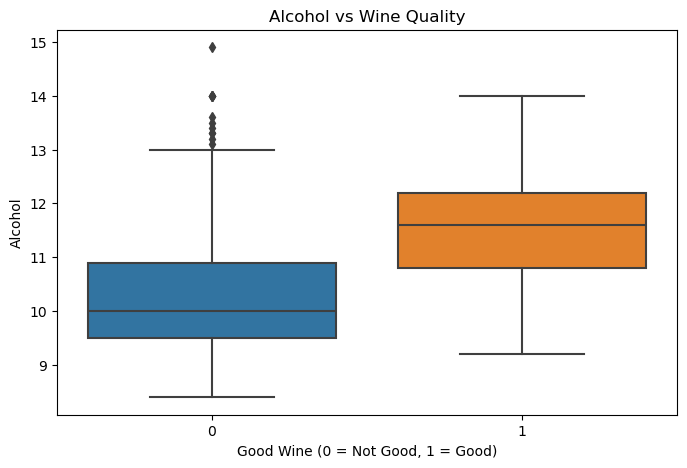

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x="good_wine", y="alcohol", data=df)
plt.title("Alcohol vs Wine Quality")
plt.xlabel("Good Wine (0 = Not Good, 1 = Good)")
plt.ylabel("Alcohol")
plt.show()


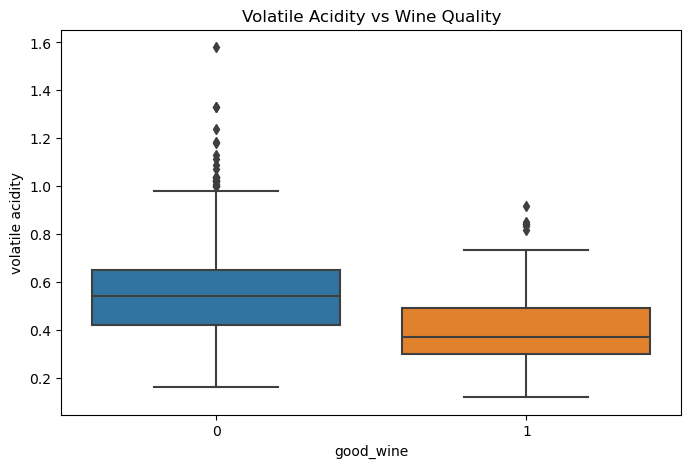

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="good_wine", y="volatile acidity", data=df)
plt.title("Volatile Acidity vs Wine Quality")
plt.show()


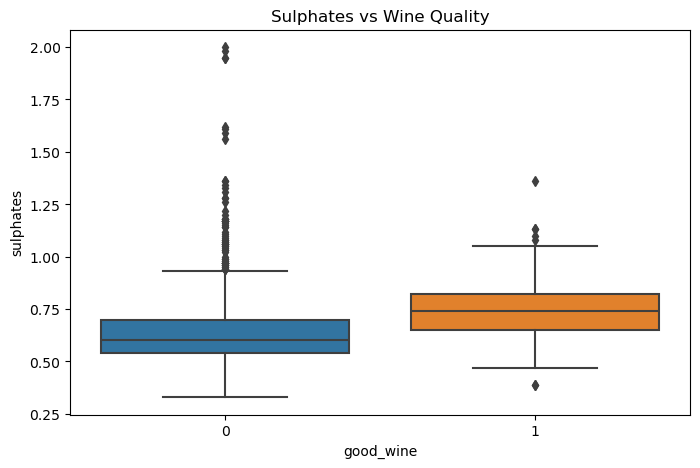

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="good_wine", y="sulphates", data=df)
plt.title("Sulphates vs Wine Quality")
plt.show()

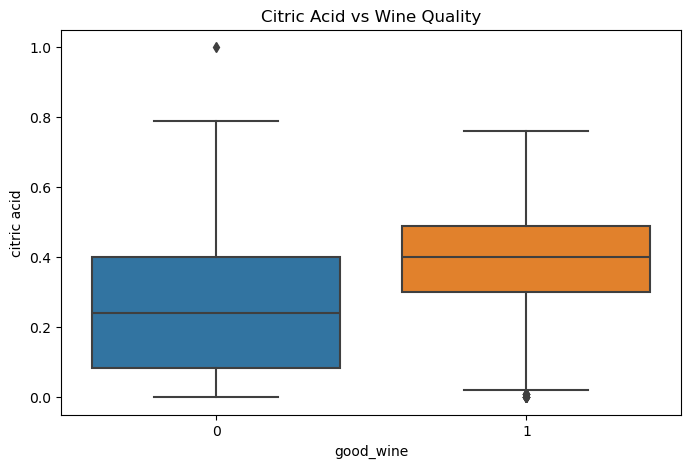

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x="good_wine", y="citric acid", data=df)
plt.title("Citric Acid vs Wine Quality")
plt.show()


In [7]:
#Feature & Target Split
X = df.drop(["quality", "good_wine"], axis=1)
y = df["good_wine"]

X.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [8]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
#Feature Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
#Logistic Regression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train_scaled, y_train)

y_train_lr = lr.predict(X_train_scaled)
y_test_lr = lr.predict(X_test_scaled)

print("Logistic Regression Train Accuracy:", accuracy_score(y_train, y_train_lr))
print("Logistic Regression Test Accuracy :", accuracy_score(y_test, y_test_lr))

print(classification_report(y_test, y_test_lr))


Logistic Regression Train Accuracy: 0.7834245504300235
Logistic Regression Test Accuracy : 0.8125
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       277
           1       0.40      0.79      0.53        43

    accuracy                           0.81       320
   macro avg       0.68      0.80      0.71       320
weighted avg       0.89      0.81      0.84       320



In [11]:
#Decision Tree
dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train_scaled, y_train)

y_train_dt = dt.predict(X_train_scaled)
y_test_dt = dt.predict(X_test_scaled)

print("Decision Tree Train Accuracy:", accuracy_score(y_train, y_train_dt))
print("Decision Tree Test Accuracy :", accuracy_score(y_test, y_test_dt))

print(classification_report(y_test, y_test_dt))


Decision Tree Train Accuracy: 0.7888975762314308
Decision Tree Test Accuracy : 0.8
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       277
           1       0.39      0.86      0.54        43

    accuracy                           0.80       320
   macro avg       0.68      0.83      0.70       320
weighted avg       0.89      0.80      0.83       320



In [12]:
#Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train_scaled, y_train)

y_train_rf = rf.predict(X_train_scaled)
y_test_rf = rf.predict(X_test_scaled)

print("Random Forest Train Accuracy:", accuracy_score(y_train, y_train_rf))
print("Random Forest Test Accuracy :", accuracy_score(y_test, y_test_rf))

print(classification_report(y_test, y_test_rf))


Random Forest Train Accuracy: 0.9585613760750586
Random Forest Test Accuracy : 0.925
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       277
           1       0.73      0.70      0.71        43

    accuracy                           0.93       320
   macro avg       0.84      0.83      0.84       320
weighted avg       0.92      0.93      0.92       320



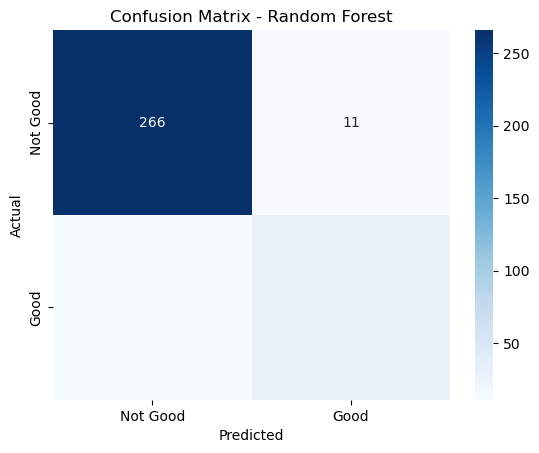

Confusion Matrix:
[[266  11]
 [ 13  30]]


In [16]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_test_rf)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Good", "Good"],
    yticklabels=["Not Good", "Good"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_test_rf)
print(cm)


ROC-AUC Score: 0.925614977751658


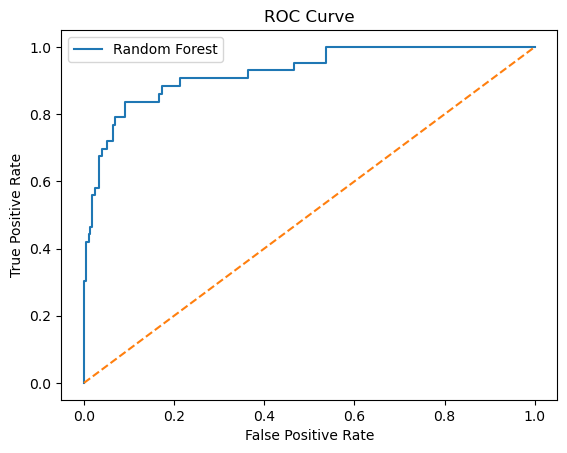

In [47]:
#ROC Curve & AUC
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


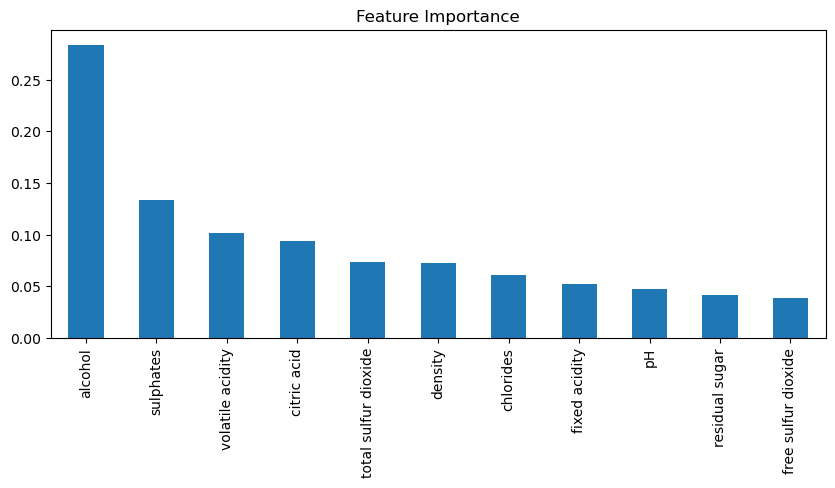

In [48]:
#Feature importance
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind="bar", figsize=(10,4))
plt.title("Feature Importance")
plt.show()


In [49]:
#Save Model & Scaler
joblib.dump(rf, "red_wine_quality_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved")


Model and scaler saved


In [50]:
#Load and Saved Model
loaded_model = joblib.load("red_wine_quality_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [51]:
#All types of accuracy traing and test data
accuracy_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Train Accuracy": [
        accuracy_score(y_train, y_train_lr),
        accuracy_score(y_train, y_train_dt),
        accuracy_score(y_train, y_train_rf)
    ],
    "Test Accuracy": [
        accuracy_score(y_test, y_test_lr),
        accuracy_score(y_test, y_test_dt),
        accuracy_score(y_test, y_test_rf)
    ]
})

accuracy_df


,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.783425,0.8125
1,Decision Tree,0.788898,0.8000
2,Random Forest,0.958561,0.9250


In [62]:
#Example
sample_df = pd.DataFrame([{
    "fixed acidity": 7.4,
    "volatile acidity": 0.70,
    "citric acid": 0.00,
    "residual sugar": 1.9,
    "chlorides": 0.476,
    "free sulfur dioxide": 11,
    "total sulfur dioxide": 34,
    "density": 0.8,
    "pH": 7.51,
    "sulphates": 0.56,
    "alcohol": 6.4
}])

sample_scaled = loaded_scaler.transform(sample_df)

prediction = loaded_model.predict(sample_scaled)

print("Prediction:", "Good Wine" if prediction[0] == 1 else "Not Good Wine")


Prediction: Not Good Wine


In [64]:
#User input
fixed_acidity = float(input("Enter Fixed Acidity: "))
volatile_acidity = float(input("Enter Volatile Acidity: "))
citric_acid = float(input("Enter Citric Acid: "))
residual_sugar = float(input("Enter Residual Sugar: "))
chlorides = float(input("Enter Chlorides: "))
free_sulfur_dioxide = float(input("Enter Free Sulfur Dioxide: "))
total_sulfur_dioxide = float(input("Enter Total Sulfur Dioxide: "))
density = float(input("Enter Density: "))
ph = float(input("Enter pH: "))
sulphates = float(input("Enter Sulphates: "))
alcohol = float(input("Enter Alcohol: "))

Enter Fixed Acidity:  7.8
Enter Volatile Acidity:  0.32
Enter Citric Acid:  0.42
Enter Residual Sugar:  2.0
Enter Chlorides:  0.065
Enter Free Sulfur Dioxide:  12
Enter Total Sulfur Dioxide:  40
Enter Density:  0.995
Enter pH:  7.73
Enter Sulphates:  0.72
Enter Alcohol:  12.8


In [65]:
#Convert User input to DataFrame
user_input_df = pd.DataFrame([{
    "fixed acidity": fixed_acidity,
    "volatile acidity": volatile_acidity,
    "citric acid": citric_acid,
    "residual sugar": residual_sugar,
    "chlorides": chlorides,
    "free sulfur dioxide": free_sulfur_dioxide,
    "total sulfur dioxide": total_sulfur_dioxide,
    "density": density,
    "pH": ph,
    "sulphates": sulphates,
    "alcohol": alcohol
}])


In [66]:
#Scale User Input
user_input_scaled = loaded_scaler.transform(user_input_df)

In [67]:
#Predict Wine Quality
prediction = loaded_model.predict(user_input_scaled)

if prediction[0] == 1:
    print("Prediction: GOOD QUALITY WINE")
else:
    print("Prediction: NOT GOOD QUALITY WINE")


Prediction: GOOD QUALITY WINE
